# Реальные и фейковые предложения о работе.

Требуется на основе классификационной модели определить какие предложения настоящие, а какие нет.
Данный датасет содержит пример 18000 запросов со следующими колонками:
- job_id - уникальный идентификатор
- title - общее название должности
- location - географическое местоположение работы
- department - отделение
- salary_range - интервал зарплаты
- company_profile - описание компании
- description - описание работы
- requirements - необходимые для работы требования
- benefits - полезности для работника
- telecommuting - удаленная или нет работа
- has_company_logo - имеет ли компания лого
- has_questions - есть ли проверочные вопросы
- employment_type - вид занятости
- required_experience - опыт работы
- required_education - образование
- industry - сфера деятельности
- function - какие функции выполняет работник
- fraudulent - реальная или фейковая работы

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 

import pandas as pd            
import seaborn as sns          
import sklearn

In [2]:
url = 'fake_job_postings.csv'
data = pd.read_csv(url)

In [3]:
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
data_for_num = data.describe()
data_for_num

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Здесь приведены основные характеристики количественных признаков.

In [5]:
data_for_cat = data.describe(include=['object'])
data_for_cat

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,17880,17534,6333,2868,14572,17879,15185,10670,14409,10830,9775,12977,11425
unique,11231,3105,1337,874,1709,14801,11968,6205,5,7,13,131,37
top,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology
freq,311,718,551,142,726,379,410,726,11620,3809,5145,1734,1749


In [6]:
print(data.shape)

(17880, 18)


Здесь приведены описательные характеристики категориальных признаков. Например top - часто встречающееся слово.

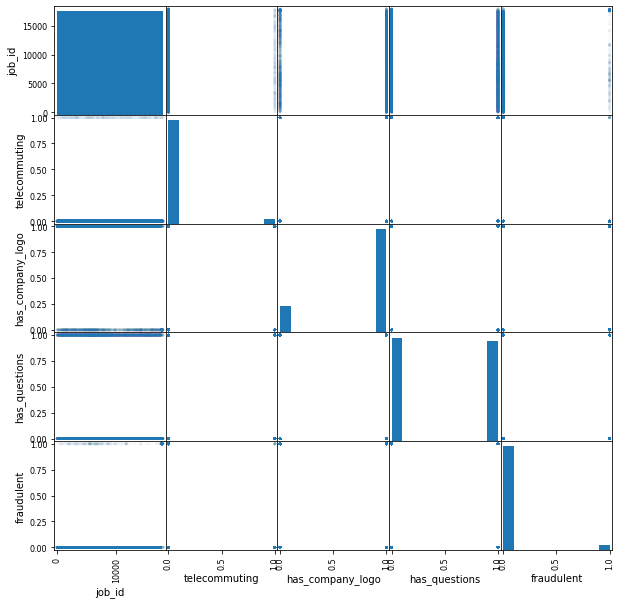

In [7]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

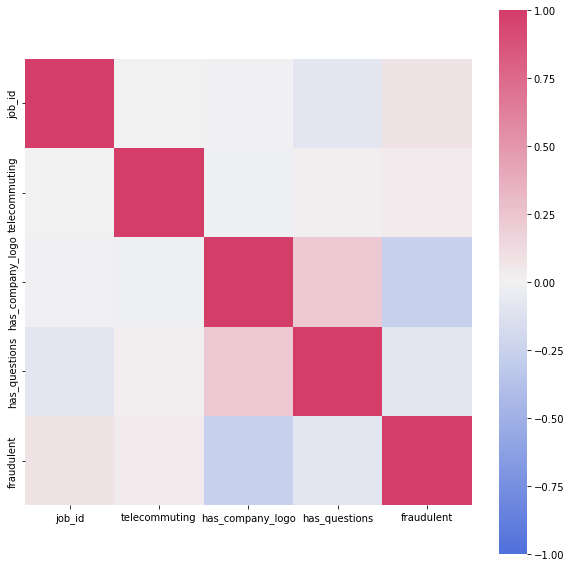

In [8]:
plt.figure(figsize = (10,10))
corr = data.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True, vmin = -1, vmax = 1)
pass

Выше приведены матрица разбросов и матрица корреляций. Выбросов как таковых нет, так как большинство количественных признаков принимают только два значения 0 и 1. Также ни один из признаков сильно не коррелируют.

No handles with labels found to put in legend.


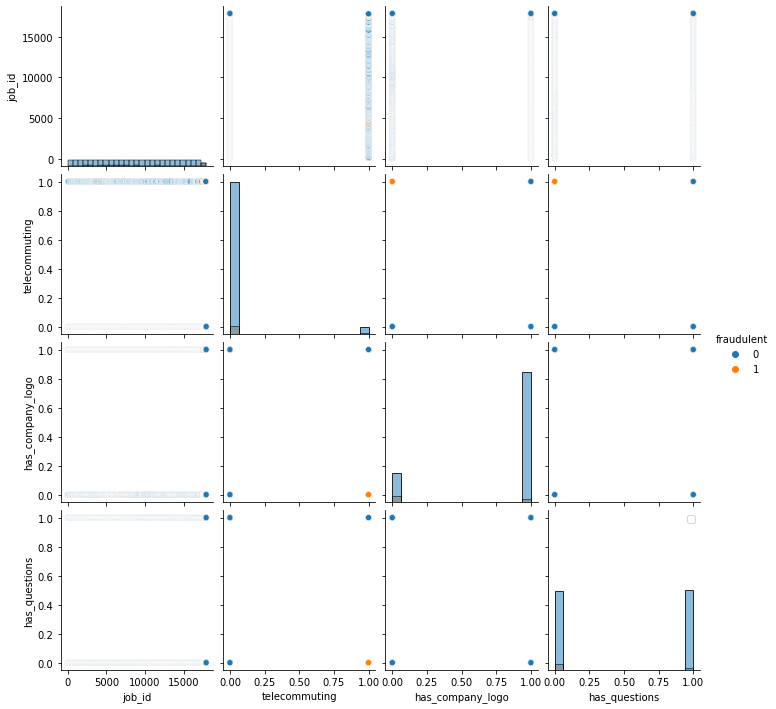

In [10]:
sns.pairplot(data = data, hue='fraudulent', diag_kind='hist')
plt.legend()
pass

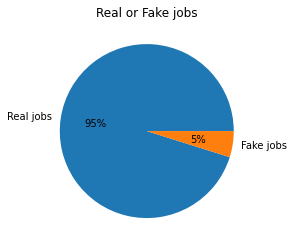

In [9]:
plt.pie(data.fraudulent.value_counts(), labels = ['Real jobs', 'Fake jobs'], autopct = '%1.0f%%', radius = 1)
plt.title('Real or Fake jobs')
pass

In [13]:
data.isnull().sum() # поиск пропущенных значений

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [14]:
data.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


Если коэффициент корреляции равен 0 то, это говорит об отсутствии корреляционных связей между переменными. Причем если коэффициент корреляции ближе к 1 (или -1) то говорится о сильной корреляции, а если ближе к 0, то о слабой.



# Обработка пропущенных значений

Как видно из таблицы, в данной таблице присутствуют пропущенные значения. Заменим таковые их средними значениями для количественных признаков и самым повторяющимся значением для категориальных.

In [15]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
print(categorical_columns)

['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [16]:
for c in categorical_columns:
    data[c] = data[c].fillna(data_for_cat[c]['top'])

In [17]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

Так как пропущенные значения были только у категориальных признаков, то после замены пропущенных значений на самое распространенное, таблица с выводом пропущенных значений не обнаружила их, а значит мы провели успешную обработку.

# Несбалансированность классов

Как видно из датасета, количество настоящих предложений о работе сильно больше, чем фейковых. А именно

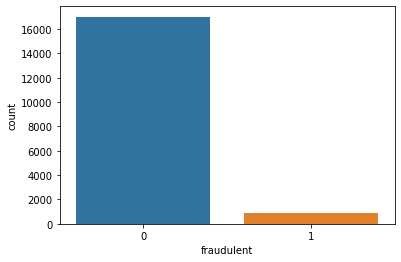

In [18]:
sns.countplot(x='fraudulent', data=data)
pass

Для того, чтобы сбалансировать классы, нужно убрать строки с настоящими предложениями о работе. Но так как данных тогда останется очень мало, чтобы на них разбивать выборку. Я убрала 15 тыс строк, и тогда балансированность двух классов стала такой:

In [19]:
data_with_balance = data
n = 15000
data_with_balance = data_with_balance.drop(data_with_balance.loc[data_with_balance['fraudulent'] == 0].sample(n=n).index)
data_with_balance

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
16,17,Hands-On QA Leader,"IL, , Tel Aviv, Israel",R&D,0-0,At HoneyBook we’re re-imagining the events ind...,We are looking for a Hands-On QA Leader for ou...,Previous experience in client &amp; server tes...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Engineering,0
36,37,Graduates: English Teacher Abroad,"US, NY, Yonkers",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,See job description,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Education Management,Information Technology,0
53,54,Technical Project Manager,"US, NY, New York City",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,GBI is a growing company developing several cu...,Must have excellent oral and written communica...,"Experience with CRM, such as SugarCRM.Past emp...",0,0,0,Full-time,Associate,Bachelor's Degree,Financial Services,Information Technology,0
59,60,Product Visual Designer,"US, CA, San Francisco",Sales,0-0,"From the lands of Can Do, Roll Our Sleeves Up ...",Apcera is revolutionizing enterprise technolog...,RESPONSIBILITIES:Work with the UX architect's ...,Competitive salary &amp; equityGreat location ...,0,1,1,Full-time,Not Applicable,Unspecified,Information Technology and Services,Design,0
61,62,Bulk Ingredient Unloader,"US, IA, Cedar Rapids",General Services,0-0,"Red Star Yeast Company LLC (RSYC), a leader in...",The primary function of this position is to pe...,Must be able to understand and follow the flow...,"Benefit, Compensation and Shift Schedule Detai...",0,1,1,Full-time,Entry level,High School or equivalent,Food Production,Supply Chain,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17860,17861,Sr. SQL Server DBA,"US, CA, Bay Area",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Position: Sr. SQL Server DBALocation: Bay Area...,Provide 24x7 on-call support,See job description,0,1,0,Contract,Mid-Senior level,Unspecified,Information Technology and Services,Information Technology,0
17864,17865,Next Generation Depth Sensing,"US, MA, Cambridge",MM,0-0,MERL's internship program gives students excel...,MERL is looking for a well qualified individua...,University degree required. TEFL / TESOL / CEL...,See job description,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17869,17870,Sr Technical Lead LIMS,"US, DE, Wilmington",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,Job Title: Sr Technical LeadSalary: OpenDurat...,Responsibilities: He should be extensive knowl...,See job description,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Pharmaceuticals,Information Technology,0
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,0-0,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


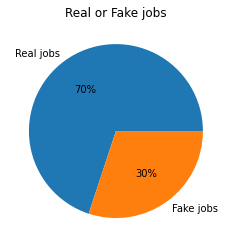

In [20]:
plt.pie(data_with_balance.fraudulent.value_counts(), labels = ['Real jobs', 'Fake jobs'], autopct = '%1.0f%%', radius = 1)
plt.title('Real or Fake jobs')
pass

# Обработка категориальных признаков
По таблице видно, что все столбы небинарны. Так как значение уникальных признаков больше двух.
Проведем векторизацию признаков, заменяя все уникальные значения на уникальный столбец.

In [21]:
del data_with_balance['salary_range']
del data_with_balance['job_id']
del data_with_balance['department']
del data_with_balance['benefits']
del data_with_balance['title']

Убираем данные столбцы, так как идентификатор никак не влияет на будущую выборку, а зарплата содержала много пропущенных значений.

In [22]:
data_with_balance

,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
16,"IL, , Tel Aviv, Israel",At HoneyBook we’re re-imagining the events ind...,We are looking for a Hands-On QA Leader for ou...,Previous experience in client &amp; server tes...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Engineering,0
36,"US, NY, Yonkers",We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it :-)Love travel...",University degree required. TEFL / TESOL / CEL...,0,1,0,Contract,Mid-Senior level,Bachelor's Degree,Education Management,Information Technology,0
53,"US, NY, New York City",We help teachers get safe &amp; secure jobs ab...,GBI is a growing company developing several cu...,Must have excellent oral and written communica...,0,0,0,Full-time,Associate,Bachelor's Degree,Financial Services,Information Technology,0
59,"US, CA, San Francisco","From the lands of Can Do, Roll Our Sleeves Up ...",Apcera is revolutionizing enterprise technolog...,RESPONSIBILITIES:Work with the UX architect's ...,0,1,1,Full-time,Not Applicable,Unspecified,Information Technology and Services,Design,0
61,"US, IA, Cedar Rapids","Red Star Yeast Company LLC (RSYC), a leader in...",The primary function of this position is to pe...,Must be able to understand and follow the flow...,0,1,1,Full-time,Entry level,High School or equivalent,Food Production,Supply Chain,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17860,"US, CA, Bay Area",We help teachers get safe &amp; secure jobs ab...,Position: Sr. SQL Server DBALocation: Bay Area...,Provide 24x7 on-call support,0,1,0,Contract,Mid-Senior level,Unspecified,Information Technology and Services,Information Technology,0
17864,"US, MA, Cambridge",MERL's internship program gives students excel...,MERL is looking for a well qualified individua...,University degree required. TEFL / TESOL / CEL...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
17869,"US, DE, Wilmington",We help teachers get safe &amp; secure jobs ab...,Job Title: Sr Technical LeadSalary: OpenDurat...,Responsibilities: He should be extensive knowl...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Pharmaceuticals,Information Technology,0
17875,"CA, ON, Toronto",Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0


In [23]:
data_with_balance['text'] = data_with_balance['location'] + ' ' + data_with_balance['company_profile'] + ' ' + data_with_balance['description'] + ' ' + data_with_balance['requirements'] + ' ' + data_with_balance['employment_type'] + ' ' + data_with_balance['required_education'] + ' ' + data_with_balance['industry'] + ' ' + data_with_balance['function']
del data_with_balance['location']
del data_with_balance['company_profile']
del data_with_balance['description']
del data_with_balance['requirements']
del data_with_balance['employment_type']
del data_with_balance['required_experience']
del data_with_balance['required_education']
del data_with_balance['industry']
del data_with_balance['function']

data_with_balance.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
16,0,1,0,0,"IL, , Tel Aviv, Israel At HoneyBook we’re re-i..."
36,0,1,0,0,"US, NY, Yonkers We help teachers get safe &amp..."
53,0,0,0,0,"US, NY, New York City We help teachers get saf..."
59,0,1,1,0,"US, CA, San Francisco From the lands of Can Do..."
61,0,1,1,0,"US, IA, Cedar Rapids Red Star Yeast Company LL..."


Здесь мы объединяем все строки в один общий столбец, так как при векторизации получилось бы очень много столбцов.

In [24]:
new_categorical_columns = [c for c in data_with_balance.columns if data_with_balance[c].dtype.name == 'object']
data_nonbinary = pd.get_dummies(data_with_balance[new_categorical_columns])
print(data_nonbinary.columns)

Index(['text_AE, ,  We help teachers get safe &amp; secure jobs abroad :) Greetings from VAM SYSTEMS…..VAM SYSTEMS is a Business Consulting, IT Solutions and Services company with operations in UAE, Qatar, Bahrain, USA, Australia, Singapore &amp; India. We offers a comprehensive list of services in the field of IT infrastructure management, Cloud services, IT Consulting Services, Banking, Management Resources, Information Technology Development, Telecom, Aviation, Retail Management &amp; eGovernment offerings.VAM SYSTEMS is currently looking for PeopleSoft Financial Consultant for our UAE operations .Terms and conditions: Joining time frame: 2 weeks (maximum 1 month).The selected candidates shall join VAM SYSTEMS – UAE and shall be deputed to one of the leading Organizations in UAE.Should you be interested in this opportunity, please send your latest resume in MS Word format at the earliest at #EMAIL_b08cf5e4101b4b7b7594fe3081f94f7f9a0f2d6192fb5d4a1a72ecf03c816e83# or call us #PHONE_18

In [25]:
len(data_nonbinary.columns)

2851

# Нормализация количественных признаков

In [26]:
numerical_columns = [c for c in data_with_balance.columns if data_with_balance[c].dtype.name != 'object']
data_numerical = data_with_balance[numerical_columns]
data_numerical

,telecommuting,has_company_logo,has_questions,fraudulent
16,0,1,0,0
36,0,1,0,0
53,0,0,0,0
59,0,1,1,0
61,0,1,1,0
...,...,...,...,...
17860,0,1,0,0
17864,0,1,1,0
17869,0,0,0,0
17875,0,1,1,0


In [27]:
data_with_balance[numerical_columns] = (data_with_balance[numerical_columns] - data_with_balance[numerical_columns].mean(axis = 0))/data_with_balance[numerical_columns].std(axis = 0)
data_with_balance[numerical_columns]

,telecommuting,has_company_logo,has_questions,fraudulent
16,-0.231048,0.714177,-0.891132,-0.655622
36,-0.231048,0.714177,-0.891132,-0.655622
53,-0.231048,-1.399728,-0.891132,-0.655622
59,-0.231048,0.714177,1.121778,-0.655622
61,-0.231048,0.714177,1.121778,-0.655622
...,...,...,...,...
17860,-0.231048,0.714177,-0.891132,-0.655622
17864,-0.231048,0.714177,1.121778,-0.655622
17869,-0.231048,-1.399728,-0.891132,-0.655622
17875,-0.231048,0.714177,1.121778,-0.655622


In [28]:
new_data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(new_data.shape)

(2880, 2855)


Здесь мы объединили все обработки в одну таблицу

# Обучение

In [29]:
X = new_data.drop(['fraudulent'], axis = 1)
y = new_data['fraudulent']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

print(N_train, N_test)

2016 864


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
nnb = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train.values, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.22220333973695872 20


In [34]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train.values, y_train)

err_train = np.mean(y_train != knn.predict(X_train.values))
err_test  = np.mean(y_test  != knn.predict(X_test.values))

print(err_train, err_test)

0.2222222222222222 0.22800925925925927


Какой же вывод можно сделать при этом обучении? При оптимальном количестве соседей 20 ошибка при тестовой выборке выше, а значит наблюдается переобучение

/home/ekaterina/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


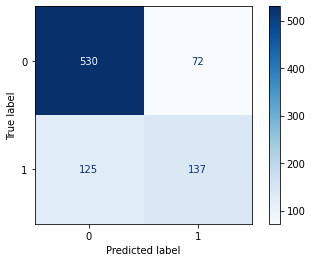

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test.values, y_test, cmap=plt.cm.Blues)
pass

# Полносвязные нейронные сети

In [129]:
from sklearn.neural_network import MLPClassifier
hidden_layer = np.arange(1, 25)
test_err = []
train_err = []
for neu in hidden_layer:
    mlp_model = MLPClassifier(hidden_layer_sizes = (neu, ), random_state = 42, max_iter = 1000)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

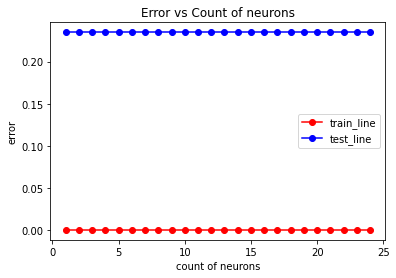

In [130]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train_line')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test_line')
plt.title('Error vs Count of neurons')
plt.xlabel('count of neurons')
plt.ylabel('error')
plt.legend()
pass

In [131]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2349537037037037


In [132]:
neu_opt = hidden_layer[test_err == min_test_err]
print(neu_opt)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [133]:
neu_opt = neu_opt[0]

In [135]:
from sklearn.metrics import accuracy_score

alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (neu_opt,), 
                              solver = 'lbfgs', activation = 'logistic', max_iter=1000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

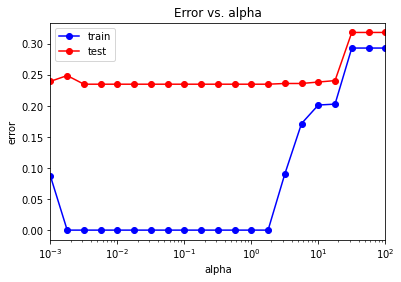

In [136]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [137]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.2349537037037037


In [138]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[0.00316228 0.00562341 0.01       0.01778279 0.03162278 0.05623413
 0.1        0.17782794 0.31622777 0.56234133 1.         1.77827941]


In [139]:
alpha_opt = alpha_opt[0]

In [141]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (neu_opt,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42, max_iter = 10000)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.2349537037037037


/home/ekaterina/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


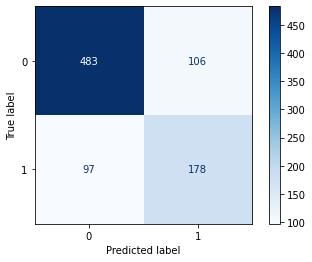

In [142]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mlp_model, X_test, y_test, cmap=plt.cm.Blues)
pass

Здесь можно заметить, что достаточно хорошо определяется настоящее предложение о работе, недели фейковая. При том также обнаружение фейковых предложений больше, чем ложно присвоенных.
Также, данный метод хуже определяет настоящее предложение о работе, и меньше причисляет к ложно-фейковому, нежели метод к-ближайших соседей

# Вывод по полносвязной нейронной сети

В первом варианте я варьировала количество нейронов, из графиков видно, что наблюдается переобучение, но при этом ошибка не зависит от самого количества нейронов.
Во втором варианте я варьировала альфа, здесь появилось несколько оптимальных значений. И также наблюдается переобучение.
При том если сравнивать метод к ближайших соседей, то здесь ошибка получилась меньше.

# Деревья решений

In [42]:
from sklearn.tree import DecisionTreeClassifier

depth = np.arange(1, 30)
test_err = []
train_err = []
hidden_layer = np.arange(1, 30)
for dep in depth:
    tree_model = DecisionTreeClassifier(max_depth = dep)
    tree_model.fit(X_train.values, y_train)

    y_train_pred = tree_model.predict(X_train.values)
    y_test_pred = tree_model.predict(X_test.values)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

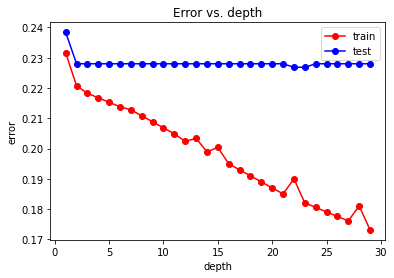

In [43]:
plt.plot(hidden_layer, train_err, 'r-o', label = 'train')
plt.plot(hidden_layer, test_err, 'b-o', label = 'test')
plt.title('Error vs. depth')
plt.xlabel('depth')
plt.ylabel('error')
plt.legend()
pass

In [45]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.17311507936507936 0.22685185185185186


In [46]:
dep_opt = depth[test_err == min_test_err]
print(dep_opt)

[22 23]


С глубиной дерева 22 или 23 наименьшее значение ошибки получилось 0.22. И также наблюдается переобучение.

# Машина опорных векторов

In [47]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train.values, y_train)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.18799603174603174, 0.22800925925925927)

In [49]:
model = SVC(kernel = 'linear')
model.fit(X_train.values, y_train)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.23726851851851852)

In [50]:
model = SVC(kernel = 'poly')
model.fit(X_train.values, y_train)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.12946428571428573, 0.22800925925925927)

Минимальное значение ошибки с данным классификатором составило 0.228

# Классификатор Байеса

In [58]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train.values, y_train)

test_er =(1 - mnb.score(X_test.values, y_test))
train_er =(1- mnb.score(X_train.values, y_train))
print(train_er, test_er)

0.12450396825396826 0.2997685185185185


Также наблюдается переобучение.

# Общие выводы.
С применением любого классификатора наблюдается переобучение. Минимальная ошибка была получена при методе Деревья решений с результатом 0.226. Худший - классификатор Байеса с результатом 0.29.